In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
G = nx.Graph()
G.graph["Name"] = "G1"

In [ ]:
nodes = ["V1","V2","V3","V4","V5","V6"]
G1_node_values = {
    "V1" : [5,7,9,2],
    "V2" : [-5,3,-1,7],
    "V3" : [1,5,3,4],
    "V4" : [5,-3,2,6],
    "V5" : [3,4,6,7],
    "V6" : [-3,4,6,-2]
}
G.add_nodes_from(nodes)

In [ ]:
G.add_edges_from([
    ("V1","V5"),
    ("V5","V4"),
    ("V4","V2"),
    ("V2","V1"),
    ("V2","V3"),
    ("V3","V6"),
    ("V6","V4"),
])

In [ ]:
pos={
    "V1":(0,4),
    "V2":(0,0),
    "V3":(2,2),
    "V4":(4,0),
    "V5":(4,5),
    "V6":(6,2),
}

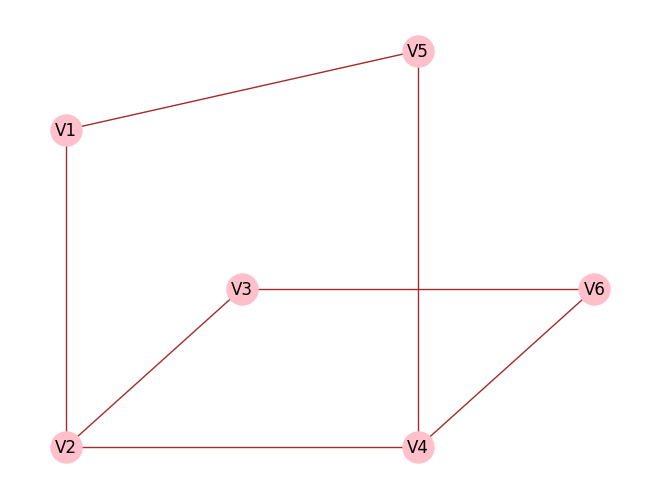

In [ ]:
p = nx.draw(G,pos=pos, with_labels=True, node_color="pink",edge_color="brown", node_size=500)

In [ ]:
for val in G1_node_values:
    print("Information for G1,s ", val)
    print("Data is ", G1_node_values[val])

Information for G1,s  V1
Data is  [5, 7, 9, 2]
Information for G1,s  V2
Data is  [-5, 3, -1, 7]
Information for G1,s  V3
Data is  [1, 5, 3, 4]
Information for G1,s  V4
Data is  [5, -3, 2, 6]
Information for G1,s  V5
Data is  [3, 4, 6, 7]
Information for G1,s  V6
Data is  [-3, 4, 6, -2]


In [ ]:
partition = [{"V1"}, {"V2"}, {"V4"}, {"V5"}, {"V3","V6"}]

In [ ]:
m = nx.quotient_graph(G, partition, node_data= None, relabel=False, create_using=None)
m.nodes
p = list(m.nodes)
out = [next(iter(fset)) for fset in p if fset]

In [ ]:
dict = {}
for i in G1_node_values:
  if i == "V3" or i == "V6":
    dict[i]=G1_node_values[i]

sum=[]
V3V6 = []
for i in dict:
  sum.append(dict[i])
q =0
p=0
for i in sum:
  for j in i:
    if q < 4:
      V3V6.append(j)
      q=q+1
    else:
      V3V6[p]=(V3V6[p]+j)/2
      p=p+1

G2_node_values = G1_node_values.copy()
del G2_node_values["V3"]
del G2_node_values["V6"]
G2_node_values["V3V6"]=V3V6

In [ ]:
H = nx.Graph()
H.graph["Name"] = "G2"



In [ ]:
H.add_nodes_from(out)

In [ ]:
H.add_edges_from([
    ("V1","V5"),
    ("V5","V4"),
    ("V4","V2"),
    ("V2","V1"),
    ("V2","V3"),
    ("V3","V4"),
])

In [ ]:
newpos={
    "V1":(0,4),
    "V2":(0,0),
    "V4":(4,0),
    "V5":(4,5),
    "V3":(2,2),
}

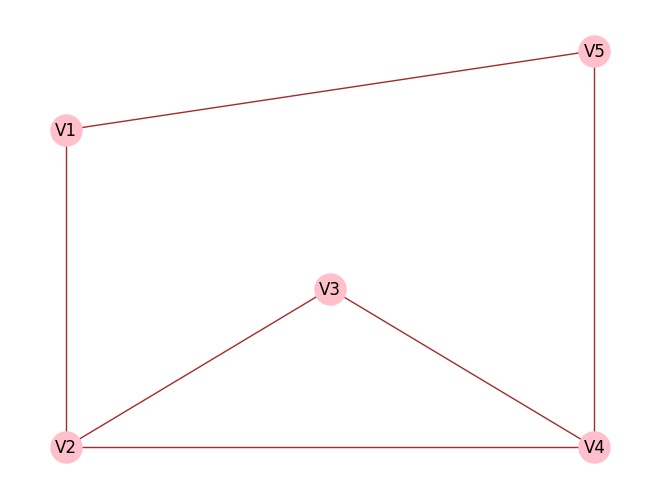

In [ ]:
nx.draw(H,with_labels=True,pos = newpos, node_color="pink",edge_color="brown",node_size=500)

In [ ]:
for val in G2_node_values:
    print("Information for G2's ", val)
    print("Data is ", G2_node_values[val])

Information for G2's  V1
Data is  [5, 7, 9, 2]
Information for G2's  V2
Data is  [-5, 3, -1, 7]
Information for G2's  V4
Data is  [5, -3, 2, 6]
Information for G2's  V5
Data is  [3, 4, 6, 7]
Information for G2's  V3V6
Data is  [-1.0, 4.5, 4.5, 1.0]
